In [1]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
import matplotlib.pylab as plt
%matplotlib inline
import sklearn
from sklearn import linear_model, decomposition
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import numpy as np

X, Y = mnist.data.astype("float64"), mnist.target 
X = preprocessing.scale(X)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

/usr/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Cwiczenie 1 (1 pkt)

Prosze narysowac wykres (plt.plot) dokladnosci w zaleznosci od wartosci C na zbiorze treningowym i testowym (dla tych N=500 przykladow)

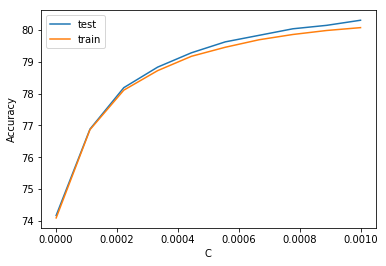

In [2]:
from sklearn.metrics import accuracy_score

size = 10
N = 500
C = np.linspace(0.000001, 0.001, size)
tests = []
trains = []

for c in C:
    model = LogisticRegression(C=c)
    model.fit(X_train[0:N], Y_train[0:N])
    Y_test_predicted = model.predict(X_test)
    A_test = 100 * accuracy_score(Y_test, Y_test_predicted)
    Y_train_predicted = model.predict(X_train)
    A_train = 100 * accuracy_score(Y_train, Y_train_predicted)
    tests.append(A_test)
    trains.append(A_train)

plt.plot(C, tests, label = "test")
plt.plot(C, trains, label = "train")
plt.legend()
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.show()

### Cwiczenie 2 (2 pkt)

(Punkt za narysowanie oraz punkt za poprawne wytłumaczenie)

Proszę narysować jak wyglądaja nauczone wagi modelu dla różnych wartości parametru C (należy użyc plt.imshow). Z czego wynikają różnice w narysowanych obrazkach? 

Uwaga: wagi modelu regresji logistycznej są wymiaru (10, 28*28). Aby narysować wagi odpowiadające klasie "3" należy pobrać w[4]. Aby narysować to z użyciem imshow należy zrobić w[4].reshape(28, 28)

C =  1e-06


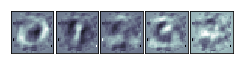

C =  0.00025075


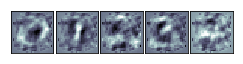

C =  0.0005005


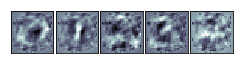

C =  0.00075025


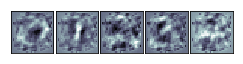

C =  0.001


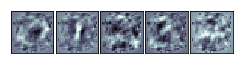

In [3]:
size = 5
N = 500
C = np.linspace(0.000001, 0.001, size)
    
for c in C:
    print("C = ",c)
    model = LogisticRegression(C = c)
    model.fit(X_train[0:N], Y_train[0:N])
    
    fig = plt.figure(figsize=(28, 28))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for i in range(size):
        p = fig.add_subplot(45, 45, i + 1, xticks=[], yticks=[])
        p.imshow(model.coef_[i].reshape(28,28), cmap=plt.cm.bone)
    plt.show()

With the increase in C, the generalization and blurring of the image increases.